<a href="https://colab.research.google.com/github/lavanayakhosla/Pharm-Assist_GGH/blob/main/Pharm_Assist_lavanayakhosla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import struct
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Bidirectional, LSTM, Reshape
from tensorflow.keras.utils import to_categorical

def load_emnist_images(filename):
    with open(filename, 'rb') as f:
        _, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols, 1)
    return images

def load_emnist_labels(filename):
    with open(filename, 'rb') as f:
        _, num_labels = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

train_images = load_emnist_images("emnist-balanced-train-images-idx3-ubyte")
train_labels = load_emnist_labels("emnist-balanced-train-labels-idx1-ubyte")

test_images = load_emnist_images("emnist-balanced-test-images-idx3-ubyte")
test_labels = load_emnist_labels("emnist-balanced-test-labels-idx1-ubyte")

print("Training Data Shape:", train_images.shape)
print(" Training Labels Shape:", train_labels.shape)
print(" Test Data Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

num_classes = 47
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Reshape((9, 128)),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.5),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=30, batch_size=128)



✅ Training Data Shape: (112800, 28, 28, 1)
✅ Training Labels Shape: (112800,)
✅ Test Data Shape: (18800, 28, 28, 1)
✅ Test Labels Shape: (18800,)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 9, 256)              │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 47)                  │          12,079 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 828,847 (3.16 MB)

 Trainable params: 828,399 (3.16 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 379s 416ms/step - accuracy: 0.4650 - loss: 1.8809 - val_accuracy: 0.8280 - val_loss: 0.5118
Epoch 2/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 382s 417ms/step - accuracy: 0.8173 - loss: 0.5453 - val_accuracy: 0.8606 - val_loss: 0.3901
Epoch 3/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 381s 416ms/step - accuracy: 0.8434 - loss: 0.4622 - val_accuracy: 0.8672 - val_loss: 0.3776
Epoch 4/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 385s 420ms/step - accuracy: 0.8577 - loss: 0.4154 - val_accuracy: 0.8755 - val_loss: 0.3522
Epoch 5/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 381s 419ms/step - accuracy: 0.8620 - loss: 0.3988 - val_accuracy: 0.8749 - val_loss: 0.3591
Epoch 6/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 379s 416ms/step - accuracy: 0.8673 - loss: 0.3804 - val_accuracy: 0.8796 - val_loss: 0.3377
Epoch 7/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 369s 419ms/step - accuracy: 0.8750 - loss: 0.3562 - val_accuracy: 0.8788 - val_loss: 0.3405
Epoch 8/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 368s 418ms/step - accuracy: 0.8744 -

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"📝 Test Accuracy: {test_acc * 100:.2f}%")


588/588 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8961 - loss: 0.3237
📝 Test Accuracy: 89.43%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


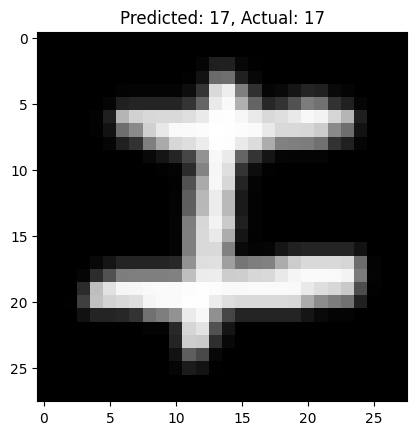

In [30]:
import matplotlib.pyplot as plt

idx = np.random.randint(0, len(test_images))
sample_image = test_images[idx].reshape(1, 28, 28, 1)
true_label = np.argmax(test_labels[idx])


predicted_probs = model.predict(sample_image)
predicted_label = np.argmax(predicted_probs)


plt.imshow(test_images[idx].reshape(28, 28), cmap="gray")
plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
plt.show()
